In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cafe_sales.csv')

In [4]:
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


None

In [6]:
display(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [7]:
unknown_counts = df.apply(lambda x: (x == 'UNKNOWN').sum())
display(unknown_counts)

Transaction ID        0
Item                344
Quantity            171
Price Per Unit      164
Total Spent         165
Payment Method      293
Location            338
Transaction Date    159
dtype: int64

In [8]:
error_counts = df.apply(lambda x: (x == 'ERROR').sum())
display(error_counts)

Transaction ID        0
Item                292
Quantity            170
Price Per Unit      190
Total Spent         164
Payment Method      306
Location            358
Transaction Date    142
dtype: int64

In [9]:
print("Total Data Sebelum Pembersihan:", len(df))


print("Jumlah Duplikat Sebelum Penghapusan:", df.duplicated().sum())
df = df.drop_duplicates()
print("Total Data Setelah Penghapusan Duplikat:", len(df))

Total Data Sebelum Pembersihan: 10000
Jumlah Duplikat Sebelum Penghapusan: 0
Total Data Setelah Penghapusan Duplikat: 10000


In [10]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [11]:
mask_ts = df['Total Spent'].isin(['ERROR', 'UNKNOWN']) | df['Total Spent'].isna()
df.loc[mask_ts & df['Quantity'].notna() & df['Price Per Unit'].notna(), 'Total Spent'] = (
    df['Quantity'] * df['Price Per Unit']
)

In [12]:
mask_q = df['Quantity'].isin(['ERROR', 'UNKNOWN']) | df['Quantity'].isna()
df.loc[mask_q & df['Total Spent'].notna() & df['Price Per Unit'].notna(), 'Quantity'] = (
    df['Total Spent'] / df['Price Per Unit']
).round()

In [13]:
mask_ppu = df['Price Per Unit'].isin(['ERROR', 'UNKNOWN']) | df['Price Per Unit'].isna()
df.loc[mask_ppu & df['Total Spent'].notna() & df['Quantity'].notna(), 'Price Per Unit'] = (
    df['Total Spent'] / df['Quantity']
)

In [14]:
df['Item'] = df['Item'].replace(['ERROR', 'UNKNOWN'], 'Unspecified').fillna('Unspecified')
df['Payment Method'] = df['Payment Method'].replace(['ERROR', 'UNKNOWN'], 'Unspecified').fillna('Unspecified')
df['Location'] = df['Location'].replace(['ERROR', 'UNKNOWN'], 'Unspecified').fillna('Unspecified')
df['Transaction Date'] = df['Transaction Date'].replace(['ERROR', 'UNKNOWN'], 'Date Missing').fillna('Date Missing')

In [15]:
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unspecified,Unspecified,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [28]:
print("1. Total Penjualan per Item:")
total_per_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
total_per_item_df = total_per_item.reset_index().rename(columns={'index': 'Item', 0: 'Total Spent'})
display(total_per_item_df)

1. Total Penjualan per Item:


,Item,Total Spent
0,Salad,17320.0
1,Sandwich,13664.0
2,Smoothie,13320.0
3,Juice,10509.0
4,Cake,10395.0
5,Unspecified,8507.5
6,Coffee,7062.0
7,Tea,4951.5
8,Cookie,3223.0


In [29]:
print("\n2. Jumlah Transaksi berdasarkan Metode Pembayaran:")
payment_counts = df['Payment Method'].value_counts()
payment_counts_df = payment_counts.reset_index().rename(columns={'index': 'Payment Method', 'Payment Method': 'Jumlah Transaksi'})
display(payment_counts_df)


2. Jumlah Transaksi berdasarkan Metode Pembayaran:


,Jumlah Transaksi,count
0,Unspecified,3178
1,Digital Wallet,2291
2,Credit Card,2273
3,Cash,2258


In [ ]:
print("\n3. Persentase Kontribusi Pendapatan per Item:")
total_spent_all = df['Total Spent'].sum()
contribution_per_item = (df.groupby('Item')['Total Spent'].sum() / total_spent_all * 100).sort_values(ascending=False)

contribution_per_item_df = pd.DataFrame(contribution_per_item).reset_index()
contribution_per_item_df.columns = ['Item', 'Kontribusi Pendapatan (%)'] 

contribution_per_item_df['Kontribusi Pendapatan (%)'] = contribution_per_item_df['Kontribusi Pendapatan (%)'].map('{:.2f}%'.format)
display(contribution_per_item_df)


3. Persentase Kontribusi Pendapatan per Item:


,Item,Kontribusi Pendapatan (%)
0,Salad,19.47%
1,Sandwich,15.36%
2,Smoothie,14.97%
3,Juice,11.81%
4,Cake,11.69%
5,Unspecified,9.56%
6,Coffee,7.94%
7,Tea,5.57%
8,Cookie,3.62%


In [32]:
print("\n4. Total Penjualan per Lokasi:")
total_per_location = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)
total_per_location_df = total_per_location.reset_index().rename(columns={'index': 'Location', 0: 'Total Spent'})
total_per_location_df['Total Spent'] = total_per_location_df['Total Spent'].map('${:.2f}'.format)
display(total_per_location_df)


4. Total Penjualan per Lokasi:


,Location,Total Spent
0,Unspecified,$35337.50
1,In-store,$27127.00
2,Takeaway,$26487.50


In [33]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Month'] = df['Transaction Date'].dt.to_period('M')


total_spent_per_item_month = df.groupby(['Month', 'Item'])['Total Spent'].sum().unstack().fillna(0)

print("Total Spent per Item tiap Bulan:")
display(total_spent_per_item_month)




Total Spent per Item tiap Bulan:


Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea,Unspecified
Month,,,,,,,,,
2023-01,855.0,556.0,250.0,918.0,1575.0,1384.0,744.0,396.0,564.0
2023-02,684.0,572.0,223.0,840.0,1200.0,1016.0,1012.0,396.0,690.5
2023-03,801.0,650.0,269.0,924.0,1330.0,1176.0,988.0,387.0,689.5
2023-04,807.0,512.0,216.0,915.0,1460.0,1028.0,1148.0,367.5,714.5
2023-05,843.0,502.0,266.0,831.0,1220.0,1156.0,1044.0,342.0,737.5
2023-06,777.0,590.0,255.0,855.0,1505.0,1104.0,1140.0,387.0,737.0
2023-07,717.0,582.0,286.0,627.0,1475.0,1056.0,1056.0,376.5,702.0
2023-08,834.0,598.0,249.0,705.0,1425.0,1024.0,1052.0,426.0,764.5
2023-09,867.0,450.0,254.0,735.0,1180.0,1108.0,1172.0,417.0,663.0


In [21]:
display(df.describe())

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9962.000000,9962.000000,9960.000000,9540
mean,3.025597,2.947902,8.930924,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.420181,1.279759,6.004475,NaN



Total outlier di Total Spent: 268 [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0

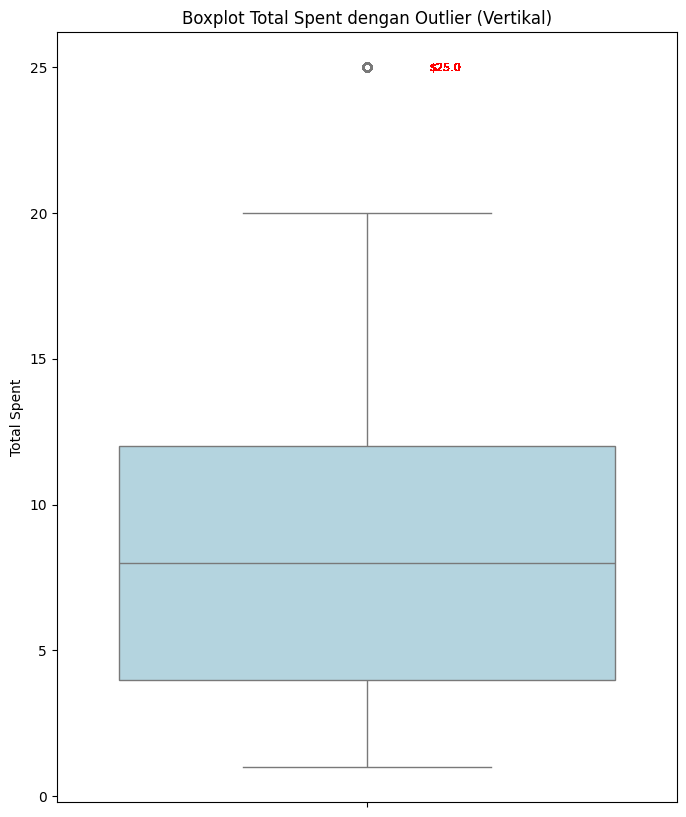

In [35]:
# Deteksi Outlier pada Total Spent
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Total Spent'] < lower_bound) | (df['Total Spent'] > upper_bound)]


total_outliers = len(outliers)
outlier_values = outliers['Total Spent'].tolist()
print(f"\nTotal outlier di Total Spent: {total_outliers} {outlier_values}")


plt.figure(figsize=(8, 10))
sns.boxplot(y=df['Total Spent'], color='lightblue')
plt.title('Boxplot Total Spent dengan Outlier (Vertikal)')
plt.ylabel('Total Spent')


for index, row in outliers.iterrows():
    plt.text(0.1, row['Total Spent'], f"${row['Total Spent']}", 
             ha='left', va='center', fontsize=8, color='red')

plt.show()

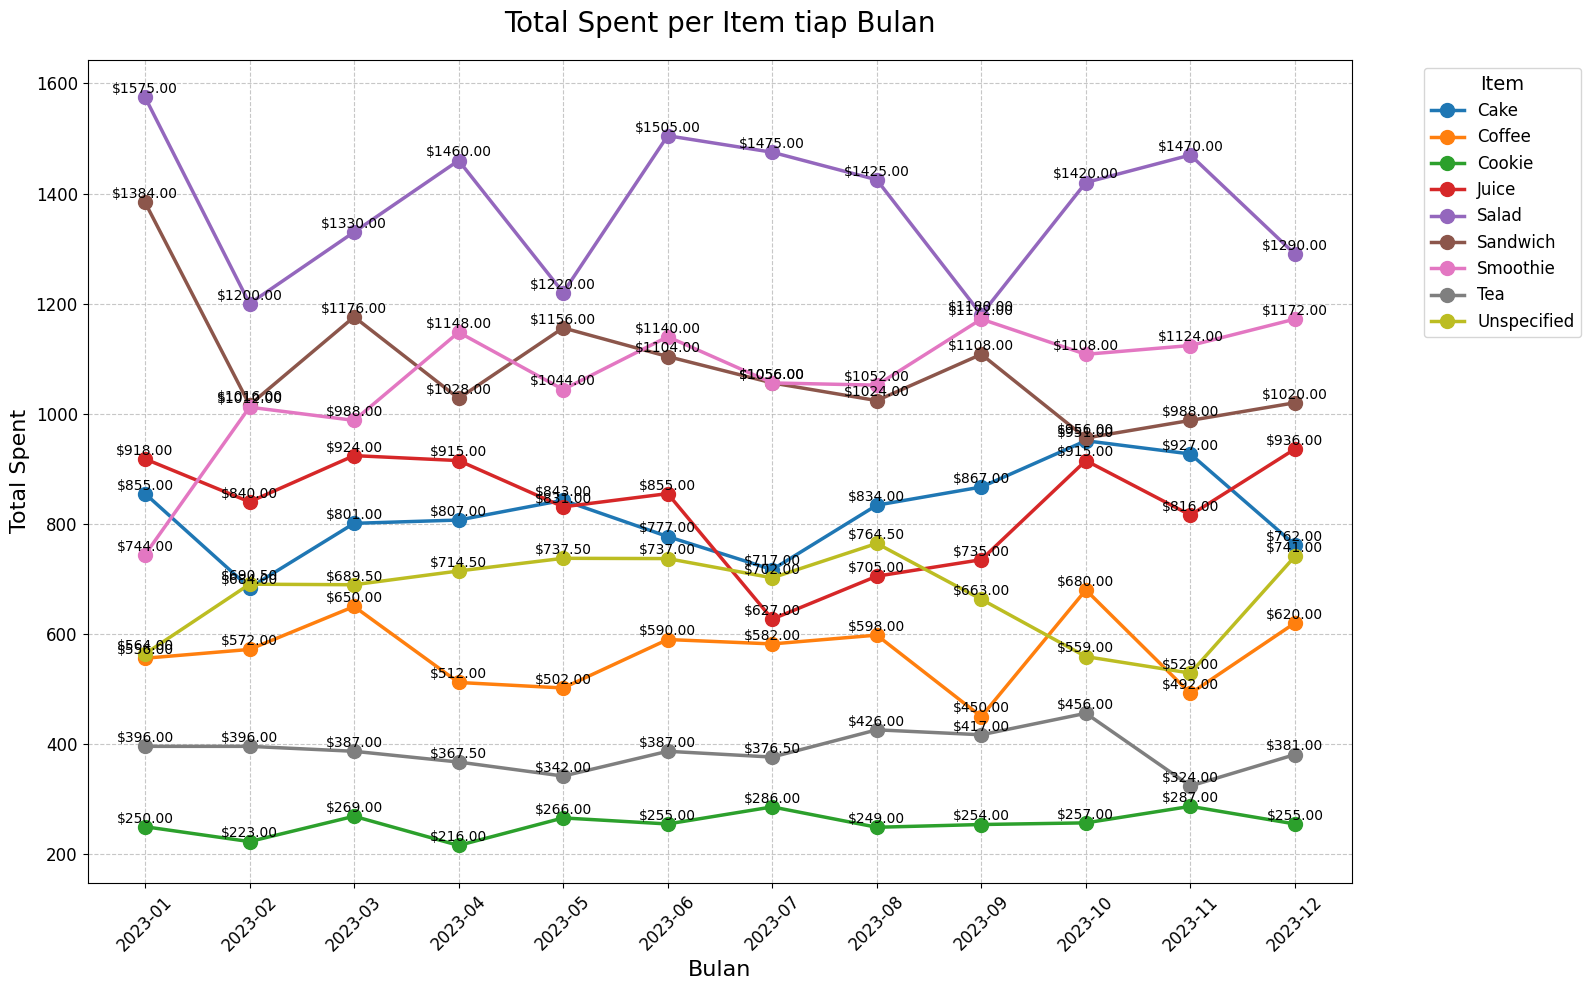

In [ ]:
# 1 Comparison
plt.figure(figsize=(16, 10))


colors = plt.cm.tab10.colors  
items = total_spent_per_item_month.columns


for i, item in enumerate(items):
    plt.plot(total_spent_per_item_month.index.astype(str), total_spent_per_item_month[item], 
             marker='o', markersize=10, linewidth=2.5, label=item, color=colors[i % len(colors)])

plt.title('Total Spent per Item tiap Bulan', fontsize=20, pad=20)
plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Item', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)


for i, item in enumerate(items):
    for j, value in enumerate(total_spent_per_item_month[item]):
        if value > 0:  
            plt.text(j, value + 2, f'${value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()



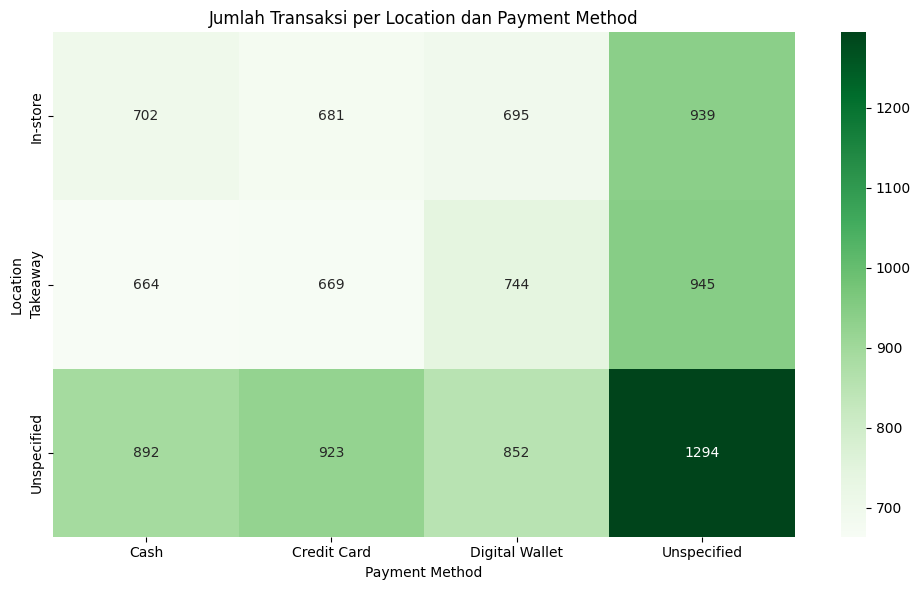

In [50]:
# relationship
plt.figure(figsize=(10, 6))
pivot_table = df.groupby(['Location', 'Payment Method']).size().unstack(fill_value=0)
sns.heatmap(pivot_table, cmap='Greens', annot=True, fmt='d')
plt.title('Jumlah Transaksi per Location dan Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

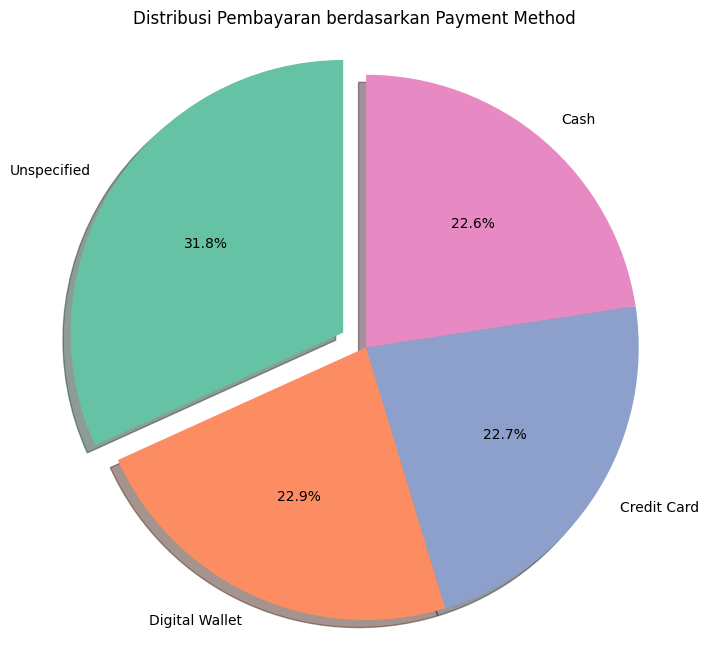

In [ ]:
# Distribution
plt.figure(figsize=(8, 8))
payment_counts = df['Payment Method'].value_counts()
total_payments = payment_counts.sum()
contribution_per_payment = (payment_counts / total_payments * 100).sort_values(ascending=False)
explode = [0.1 if i == contribution_per_payment.idxmax() else 0 for i in contribution_per_payment.index]
plt.pie(contribution_per_payment, labels=contribution_per_payment.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Set2.colors, explode=explode, shadow=True)
plt.title('Distribusi Pembayaran berdasarkan Payment Method')
plt.axis('equal')
plt.show()